# ITMAL Opgave

## Dataanalyse

### Qa) Beskrivelse af datasæt til O4 projekt

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget
bestemt, lave en regression eller klassifikation, el.lign. 

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.


### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

REVISIONS | |
--------- | |
2021-08-17 |CEF, initial version.

In [10]:
import pandas as pd

df = pd.read_csv('spotify_dataset.csv')
df = df.drop(columns=['Song ID', 'Artist', 'Number of Times Charted',
 'Week of Highest Charting', 'Song Name', 'Streams', 'Release Date',
  'Weeks Charted', 'Popularity', 'Index'])
df = df.replace(' ','0')
X = df.drop(columns=['Highest Charting Position'])
y1 = df['Highest Charting Position'].values

X.head()


,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,3377762,"['indie rock italiano', 'italian pop']",0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2230022,['australian hip hop'],0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,6266514,['pop'],0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,83293380,"['pop', 'uk pop']",0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5473565,"['lgbtq+ hip hop', 'pop rap']",0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [2]:
X['Artist Followers'] = X['Artist Followers'].astype(int)
X['Danceability'] = X['Danceability'].astype(float)
X['Energy'] = X['Energy'].astype(float)
X['Loudness'] = X['Loudness'].astype(float)
X['Speechiness'] = X['Speechiness'].astype(float)
X['Acousticness'] = X['Acousticness'].astype(float)
X['Liveness'] = X['Liveness'].astype(float)
X['Tempo'] = X['Tempo'].astype(float)
X['Duration (ms)'] = X['Duration (ms)'].astype(int)
X['Valence'] = X['Valence'].astype(float)

14612863.064910026


Text(0.5, 1.0, 'Artist Followers')

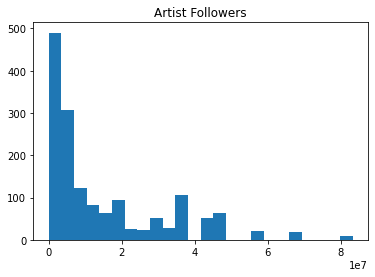

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(X['Artist Followers'].mean())
plt.hist(X['Artist Followers'],bins='auto')
plt.title('Artist Followers')

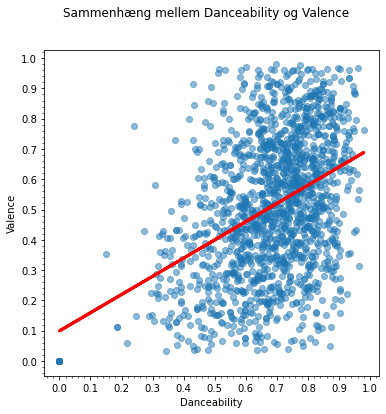

AttributeError: 'numpy.ndarray' object has no attribute 'hist2d'

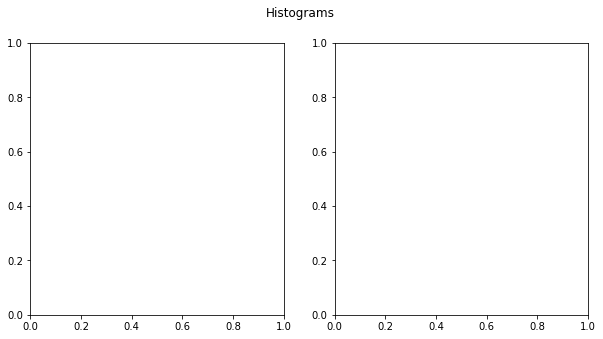

In [9]:
# Borrowed from: https://www.kaggle.com/aeryan/spotify-music-analysis/notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import linear_model

%matplotlib inline

x1 = X["Danceability"].values
y1 = X["Valence"].values

x1 = x1.reshape(x1.shape[0], 1)
y1 = y1.reshape(y1.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x1, y1)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Sammenhæng mellem Danceability og Valence")

ax = plt.subplot(1, 1, 1)
ax.scatter(x1, y1, alpha=0.5)
ax.plot(x1, regr.predict(x1), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Valence")

plt.show()

fig, (ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(X["Danceability"].values, y1, bins=20)

ax2.set_xlabel(x1)
ax2.set_ylabel(y1)

plt.colorbar(h[3], ax=ax2)

plt.show()